In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import json
import matplotlib.pyplot as plt
from PIL import Image

2024-08-20 13:07:14.363862: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/macfarqu/Desktop/My_Projects/PCGML/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def display_level_image(tile_dim, level, tile_name_to_image):
    level_image = Image.new("RGB", (tile_dim[1] * len(level[0]), tile_dim[1] * len(level) ))
    for row in range(len(level)):
        for col in range(len(level[0])):
            level_image.paste(tile_name_to_image[level[row][col]],(col * tile_dim[0], row * tile_dim[1], (col+1) * tile_dim[0], (row +1) *tile_dim[1]))
    
    plt.figure()
    plt.imshow(level_image)
    plt.show()

def translate_level(level):
    reverse_embedding_map = ["A","B","C","G","K"]
    
    for row in range(len(level)):
        for col in range(len(level[0])):
            level[row][col] = reverse_embedding_map[level[row][col]]

    return level

tile_name_to_image = {}
tiles = ["A", "B", "C", "G", "K"]
for tile in tiles:
    tile_name_to_image[tile] = Image.open(f'tiles/{tile}.png')
    
tile_dim = tile_name_to_image["A"].size

# Create Autoencoder

In [3]:
embedding_map = {
    "A": 0,
    "B": 1,
    "C": 2,
    "G": 3,
    "K": 4
}

levels = []
for i in range(16):
    with open(f"generated_levels/{i}.json", 'r') as file:
        level = json.load(file)
        for row in range(len(level)):
            for col in range(len(level[0])):
                level[row][col] = embedding_map[level[row][col]] / 4
        levels.append(level)

X = np.array(levels).reshape(len(levels), -1)
print(X)

[[0.  0.  0.  ... 0.5 0.  0.5]
 [0.  0.  0.  ... 1.  0.5 1. ]
 [0.  0.  0.  ... 1.  0.  1. ]
 ...
 [0.  0.  0.  ... 0.5 1.  1. ]
 [0.  0.  0.  ... 1.  0.5 0.5]
 [0.  0.  0.  ... 0.5 0.5 1. ]]


In [4]:
inputLevel = Input(shape=(X.shape[1],))
encoded = Dense(128, activation='relu')(inputLevel)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(X.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(inputLevel, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X, X, epochs=250)

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6927
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6881
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6830
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6769
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6693
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6600
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6487
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6351
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6190
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6002
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5788
Epoch 12/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5547
Epoch 13/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5282
Epoch 14/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4999
Epoch 15/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4708
Epoch 16/250
1/1 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], ['A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'B'], ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'K', 'A', 'A', 'A', 'A', 'A', 'A'], ['A', 'A', 'C', 'A', 'A', 'C', 'C', 'A', 'A', 'C', 'K', 'A', 'A', 'A', 'A', 'A', 'A'], ['C', 'C', 'K', 'A', 'C', 'K', 'K', 'C', 'C', 'K', 'K', 'A', 'C', 'C', 'A', 'A', 'A'], ['K', 'K', 'K', 'C', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'A', 'K', 'K', 'C', 'A', 'C']]


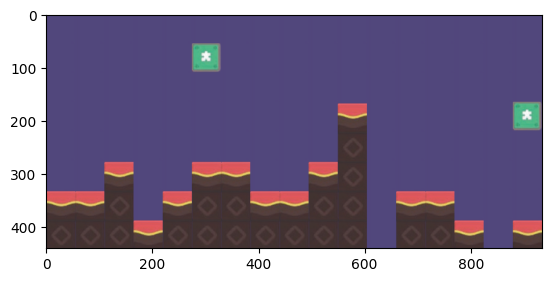

In [5]:
gen =  autoencoder.predict(np.array(levels[0]).reshape(1, 8*17))[0]
rows = 8
cols = 17

out_level = []
for row in range(rows):
    level_row = []
    for col in range(cols):
        level_row.append(round(gen[row * cols + col] * 4))
    out_level.append(level_row)

out_level = translate_level(out_level)
print(out_level)
display_level_image(tile_dim, out_level, tile_name_to_image)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0], [2, 2, 4, 0, 2, 4, 4, 2, 2, 4, 4, 0, 2, 2, 0, 0, 0], [4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 0, 2]]


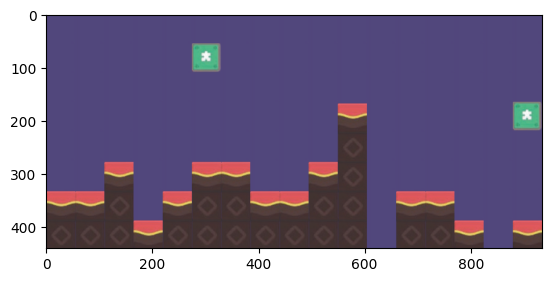

In [6]:
source_level = [[round(element * 4) for element in row] for row in levels[0]]
print(source_level)
display_level_image(tile_dim, translate_level(source_level), tile_name_to_image)

# Latent Space

In [7]:
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(encoded_input, decoder_layer)

encoder = Model(inputLevel, encoded)

In [18]:
vector_one = encoder.predict(np.array(levels[0]).reshape(1, 8*17))[0]
vector_two = encoder.predict(np.array(levels[1]).reshape(1, 8*17))[0]

a = 0.9
vector = [vector_one[i] * a + vector_two[i] * (1-a) for i in range(32)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


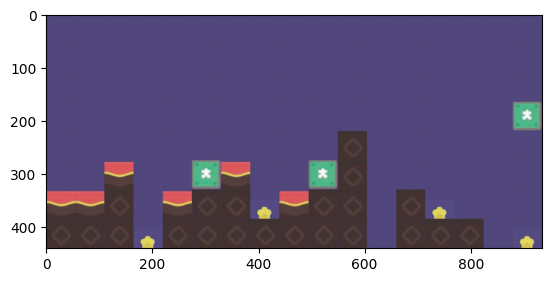

In [19]:
gen = decoder.predict(np.array(vector).reshape(1,32))[0]

rows = 8
cols = 17

out_level = []
for row in range(rows):
    level_row = []
    for col in range(cols):
        level_row.append(round(gen[row * cols + col] * 4))
    out_level.append(level_row)

result_level = translate_level(out_level)
display_level_image(tile_dim, result_level, tile_name_to_image)